# Loading the Dataset

In [9]:

import pandas as pd

header = pd.read_csv('./har/UCI HAR Dataset/features.txt', sep=' ', index_col=0, names=['feature'])
header

feature
1                       tBodyAcc-mean()-X
2                       tBodyAcc-mean()-Y
3                       tBodyAcc-mean()-Z
4                        tBodyAcc-std()-X
5                        tBodyAcc-std()-Y
..                                    ...
557      angle(tBodyGyroMean,gravityMean)
558  angle(tBodyGyroJerkMean,gravityMean)
559                  angle(X,gravityMean)
560                  angle(Y,gravityMean)
561                  angle(Z,gravityMean)

[561 rows x 1 columns]

In [10]:
header[header.duplicated(subset=['feature'])]

feature
317     fBodyAcc-bandsEnergy()-1,8
318    fBodyAcc-bandsEnergy()-9,16
319   fBodyAcc-bandsEnergy()-17,24
320   fBodyAcc-bandsEnergy()-25,32
321   fBodyAcc-bandsEnergy()-33,40
..                             ...
498  fBodyGyro-bandsEnergy()-17,32
499  fBodyGyro-bandsEnergy()-33,48
500  fBodyGyro-bandsEnergy()-49,64
501   fBodyGyro-bandsEnergy()-1,24
502  fBodyGyro-bandsEnergy()-25,48

[84 rows x 1 columns]

In [11]:
X = pd.read_csv('./har/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_original = X.copy()
X

0         1         2         3         4         5         6    \
0     0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1     0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2     0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3     0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4     0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   
...        ...       ...       ...       ...       ...       ...       ...   
7347  0.299665 -0.057193 -0.181233 -0.195387  0.039905  0.077078 -0.282301   
7348  0.273853 -0.007749 -0.147468 -0.235309  0.004816  0.059280 -0.322552   
7349  0.273387 -0.017011 -0.045022 -0.218218 -0.103822  0.274533 -0.304515   
7350  0.289654 -0.018843 -0.158281 -0.219139 -0.111412  0.268893 -0.310487   
7351  0.351503 -0.012423 -0.203867 -0.269270 -0.087212  0.177404 -0.377404   

           7         8         9    ...       551       552       553  \
0    -0.983185 -0.923527 -0.934724  ... -0.074323 -0.298676 -0.710304   
1    -0.974914 -0.957686 -0.943068  ...  0.158075 -0.595051 -0.861499   
2    -0.963668 -0.977469 -0.938692  ...  0.414503 -0.390748 -0.760104   
3    -0.982750 -0.989302 -0.938692  ...  0.404573 -0.117290 -0.482845   
4    -0.979672 -0.990441 -0.942469  ...  0.087753 -0.351471 -0.699205   
...        ...       ...       ...  ...       ...       ...       ...   
7347  0.043616  0.060410  0.210795  ... -0.070157 -0.588433 -0.880324   
7348 -0.029456  0.080585  0.117440  ...  0.165259 -0.390738 -0.680744   
7349 -0.098913  0.332584  0.043999  ...  0.195034  0.025145 -0.304029   
7350 -0.068200  0.319473  0.101702  ...  0.013865  0.063907 -0.344314   
7351 -0.038678  0.229430  0.269013  ... -0.058402 -0.387052 -0.740738   

           554       555       556       557       558       559       560  
0    -0.112754  0.030400 -0.464761 -0.018446 -0.841247  0.179941 -0.058627  
1     0.053477 -0.007435 -0.732626  0.703511 -0.844788  0.180289 -0.054317  
2    -0.118559  0.177899  0.100699  0.808529 -0.848933  0.180637 -0.049118  
3    -0.036788 -0.012892  0.640011 -0.485366 -0.848649  0.181935 -0.047663  
4     0.123320  0.122542  0.693578 -0.615971 -0.847865  0.185151 -0.043892  
...        ...       ...       ...       ...       ...       ...       ...  
7347 -0.190437  0.829718  0.206972 -0.425619 -0.791883  0.238604  0.049819  
7348  0.064907  0.875679 -0.879033  0.400219 -0.771840  0.252676  0.050053  
7349  0.052806 -0.266724  0.864404  0.701169 -0.779133  0.249145  0.040811  
7350 -0.101360  0.700740  0.936674 -0.589479 -0.785181  0.246432  0.025339  
7351 -0.280088 -0.007739 -0.056088 -0.616956 -0.783267  0.246809  0.036695  

[7352 rows x 561 columns]

In [12]:
from keras.src.utils import np_utils
y_original = pd.read_csv('./har/UCI HAR Dataset/train/y_train.txt', header=None, names=['label'])
y = pd.read_csv('./har/UCI HAR Dataset/train/y_train.txt', header=None, names=['label']).apply(lambda x: x - 1)
y = np_utils.to_categorical(y, num_classes=6)
y

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [13]:
# load activity labels
activity_labels = pd.read_csv('./har/UCI HAR Dataset/activity_labels.txt', sep=' ', index_col=0, names=['label', 'activity'])
# map the labels to the y values
y_activity = y_original['label'].map(activity_labels['activity'])

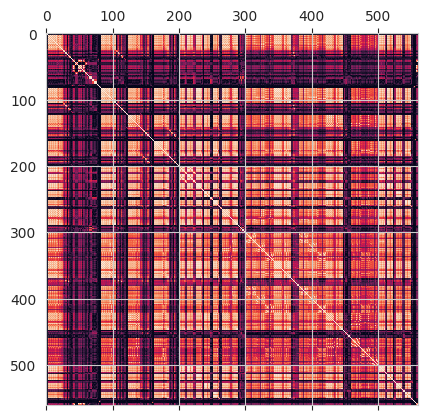

In [14]:
import matplotlib.pyplot as plt
import numpy as np

correlation_matrix = X.corr().abs()

plt.matshow(correlation_matrix)
plt.show()

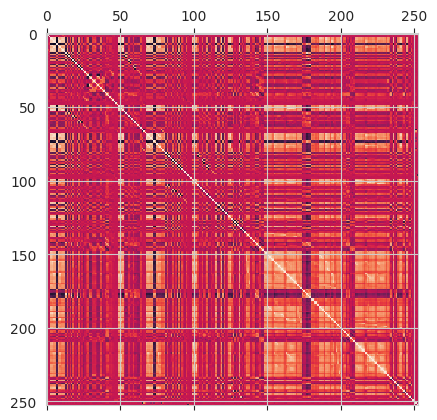

In [15]:
upper_correlation_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_correlation_matrix.columns if any(upper_correlation_matrix[column] > 0.95)]
X.drop(to_drop, axis=1, inplace=True)

plt.matshow(X.corr())
plt.show()

In [16]:
# interesting_features_indexes = [
#     index for index, row in upper_correlation_matrix.iterrows() 
#     if all(value < 0.2 for value in row if not np.isnan(value))
# ]
interesting_features_indexes = [column for column in upper_correlation_matrix.columns if all(value < 0.2 for value in upper_correlation_matrix[column] if not np.isnan(value))]

interesting_features = header.iloc[interesting_features_indexes]
interesting_features

feature
1               tBodyAcc-mean()-X
2               tBodyAcc-mean()-Y
4                tBodyAcc-std()-X
39     tBodyAcc-correlation()-X,Z
81          tBodyAccJerk-mean()-X
121            tBodyGyro-mean()-X
161        tBodyGyroJerk-mean()-X
163        tBodyGyroJerk-mean()-Z
525   fBodyBodyAccJerkMag-maxInds
551  fBodyBodyGyroJerkMag-maxInds

/home/fabian/uia/uia-dnn/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


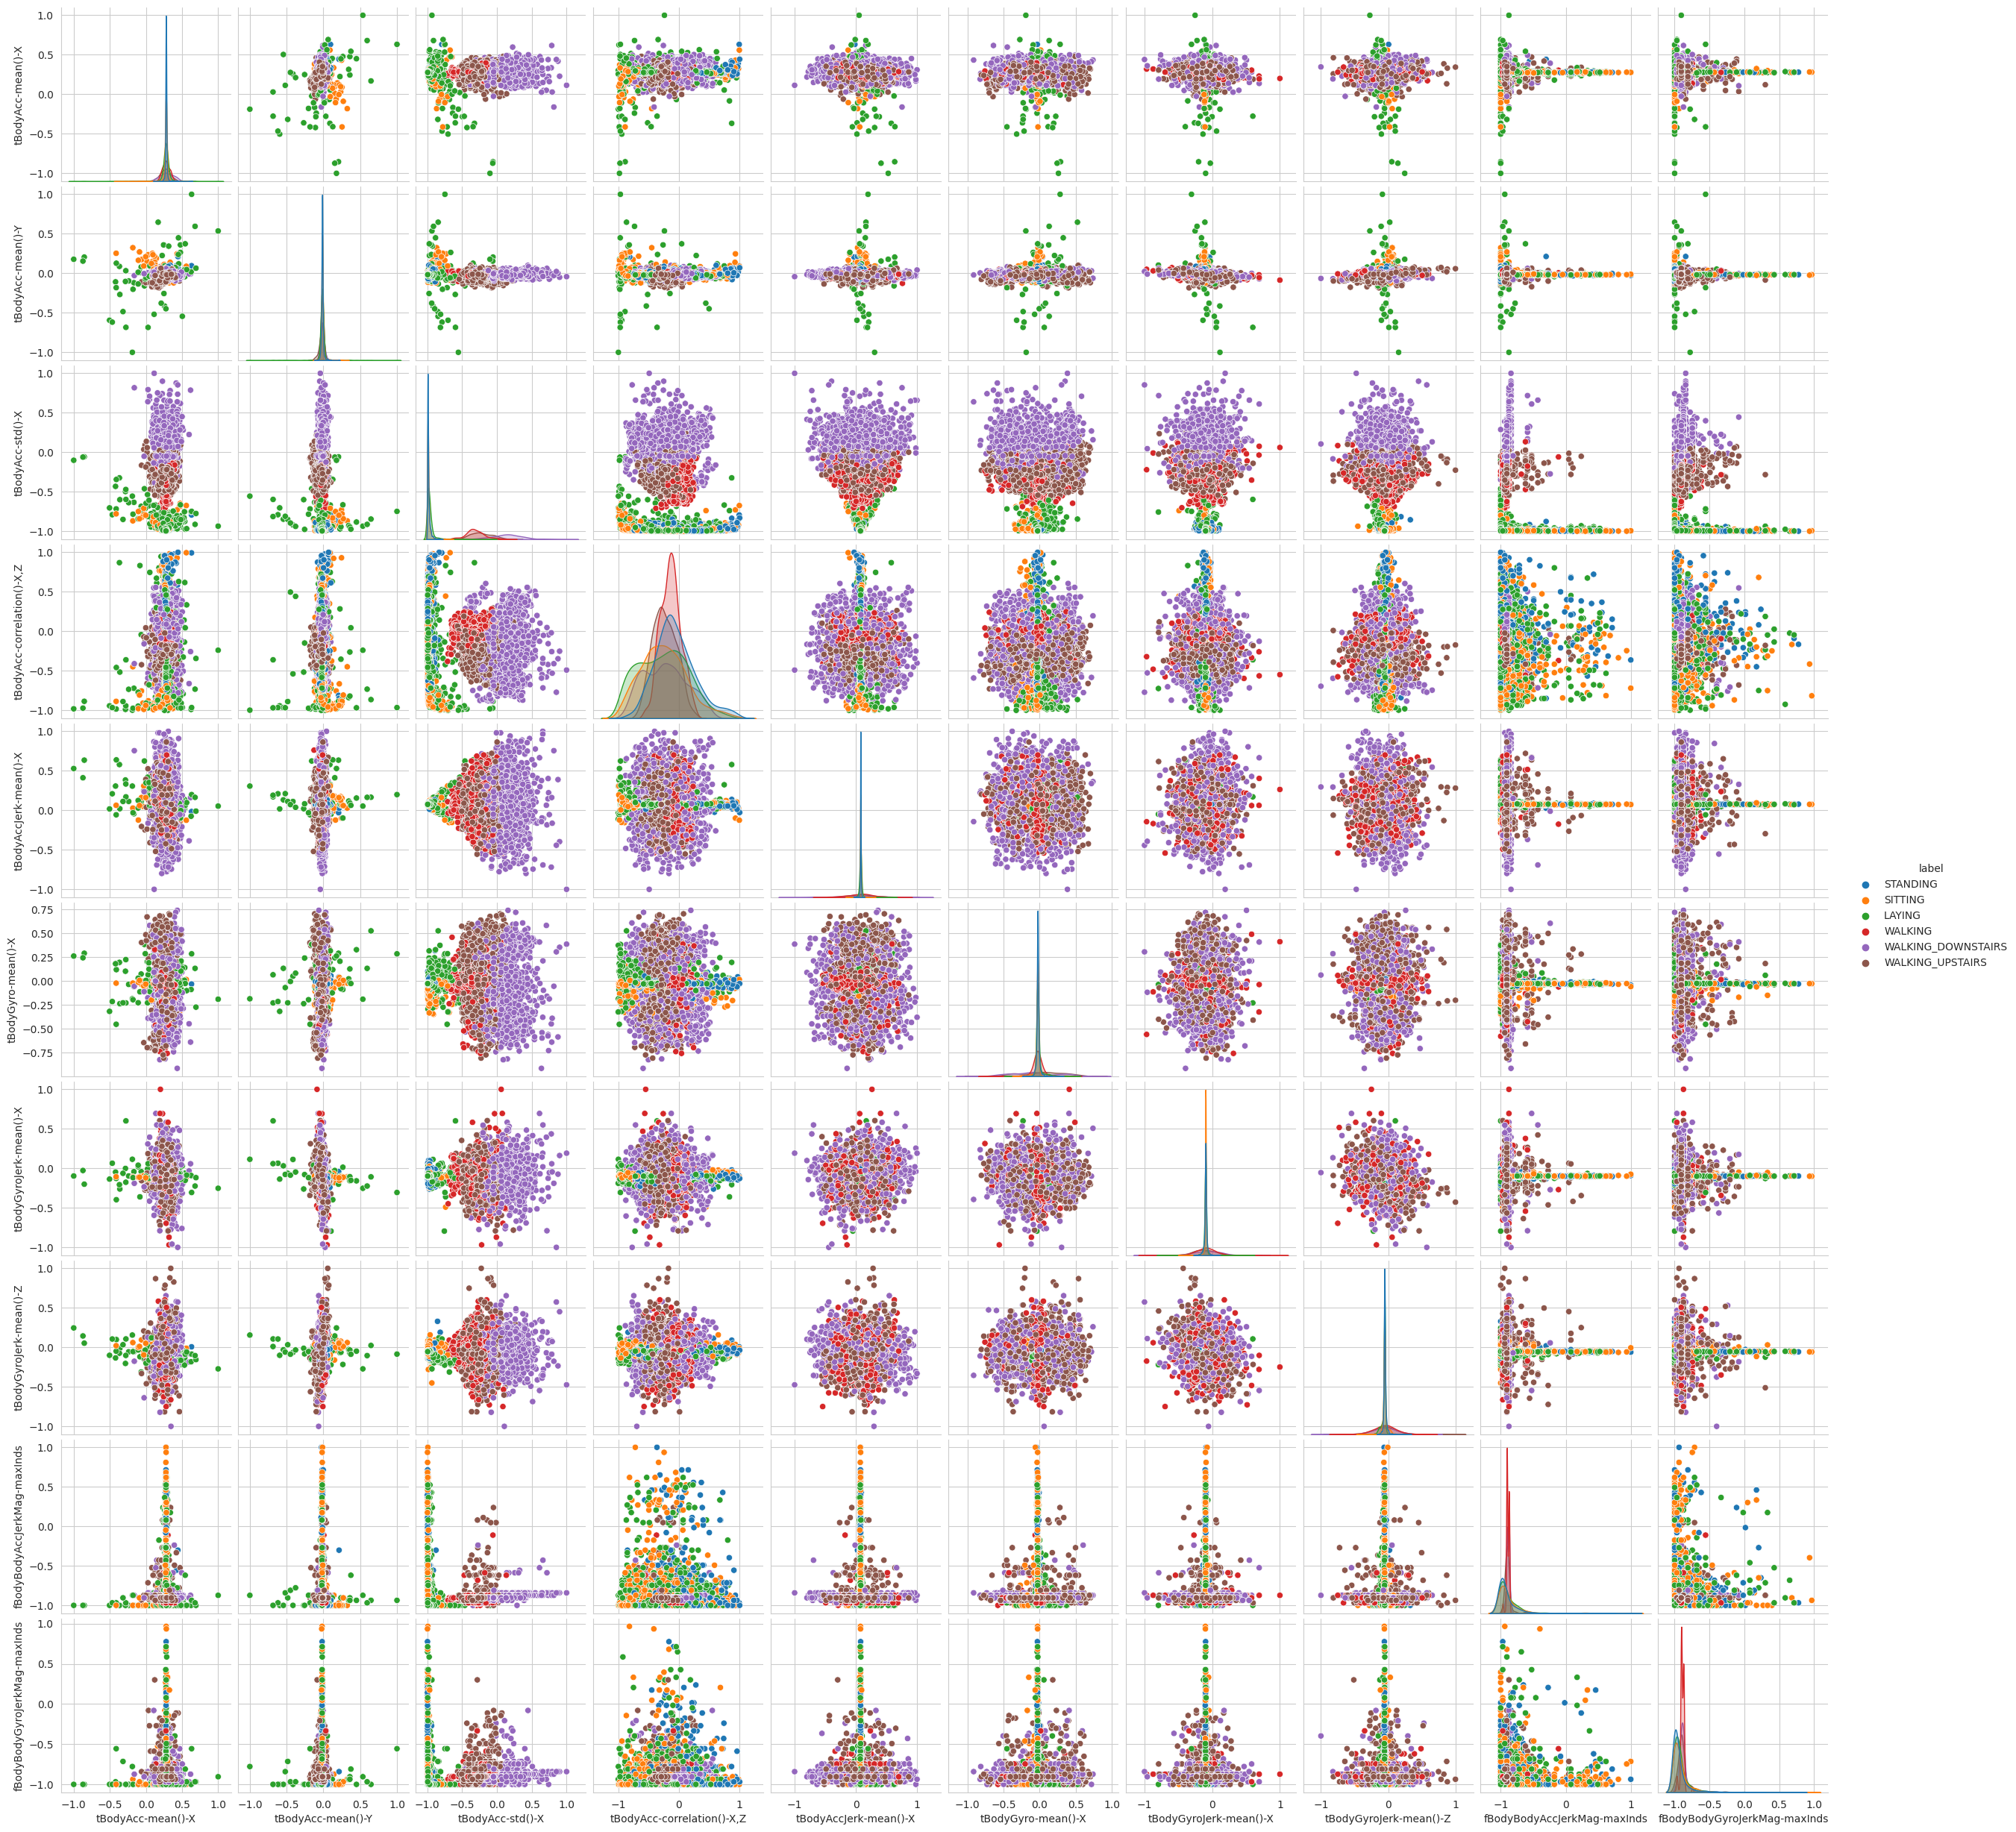

In [17]:
# Plot the distribution of tBodyAcc-mean()-X against tBodyAcc-mean()-Y
import seaborn as sns
# create dataframe from X[[1,2]] and y

df = pd.concat([X_original, y_activity], axis=1)
df.columns = [*header["feature"].values, "label"]
df_interesting_features =df[[*interesting_features["feature"].values, "label"]]

# Create a scatter plot for each combination of interesting features
sns.pairplot(df_interesting_features, hue='label')

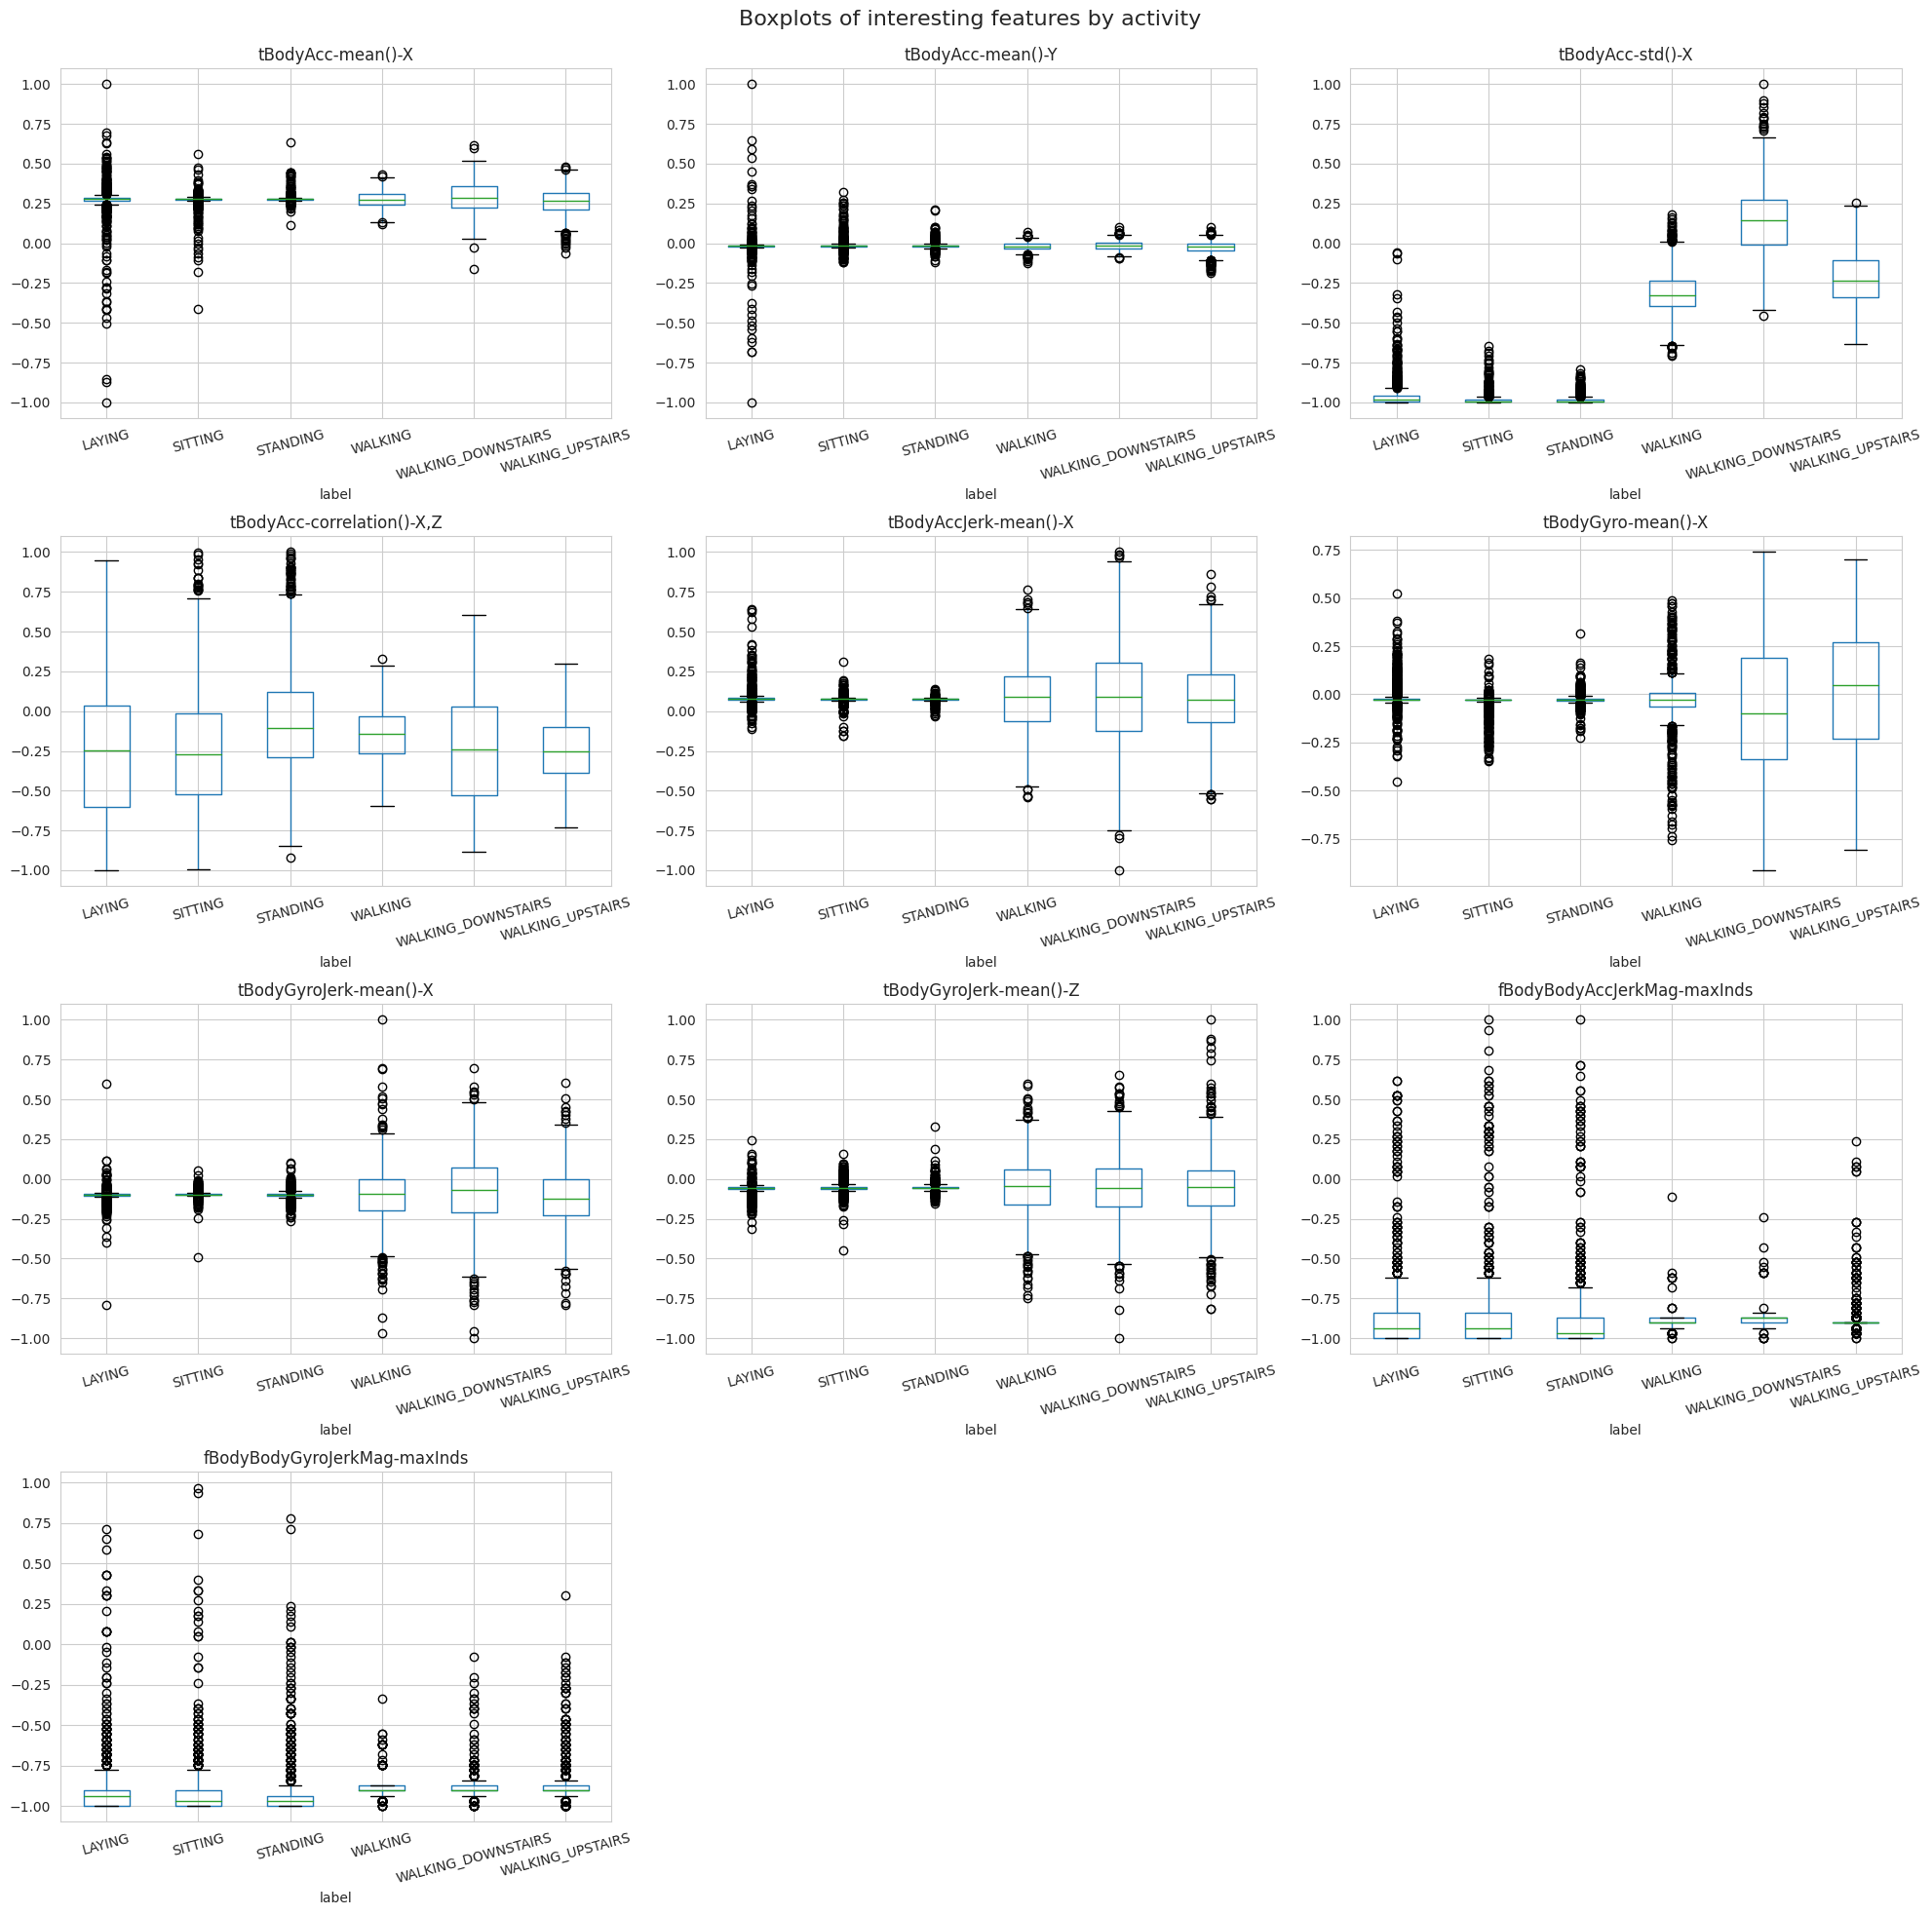

In [18]:
columns_to_plot = df_interesting_features.columns.drop('label')
n_cols = 3
n_rows = -(-len(columns_to_plot) // n_cols)  # Ceiling division

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 20))
for i, column in enumerate(columns_to_plot):
    ax = axes[i // n_cols, i % n_cols]
    df_interesting_features.boxplot(column=[column], by='label', ax=ax)
    ax.tick_params(axis='x', labelrotation=15)  

# Turn off any empty subplots
for ax in axes.flatten()[i+1:]:
    ax.axis('off')

plt.tight_layout()
plt.suptitle('Boxplots of interesting features by activity', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()


In [30]:
# load inertial signals total acceleration data for each axis
X_total_acc_x = pd.read_csv('./har/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt', delim_whitespace=True, header=None)
X_total_acc_y = pd.read_csv('./har/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt', delim_whitespace=True, header=None)
X_total_acc_z = pd.read_csv('./har/UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt', delim_whitespace=True, header=None)



X_total_acc_x["label"] = y_activity
X_total_acc_y["label"] = y_activity
X_total_acc_z["label"] = y_activity
X_total_acc_x["labelAxis"] = ['x_' + label for label in y_activity]
X_total_acc_y["labelAxis"] = ['y_' + label for label in y_activity]
X_total_acc_z["labelAxis"] = ['z_' + label for label in y_activity]

In [31]:
X_total_acc_x_timeSeries = X_total_acc_x.melt(id_vars=["label", "labelAxis"], var_name="time", value_name="acceleration")
X_total_acc_y_timeSeries = X_total_acc_y.melt(id_vars=["label", "labelAxis"], var_name="time", value_name="acceleration")
X_total_acc_z_timeSeries = X_total_acc_z.melt(id_vars=["label", "labelAxis"], var_name="time", value_name="acceleration")

# concatenate the three dataframes
df_long = pd.concat([X_total_acc_x_timeSeries, X_total_acc_y_timeSeries, X_total_acc_z_timeSeries])

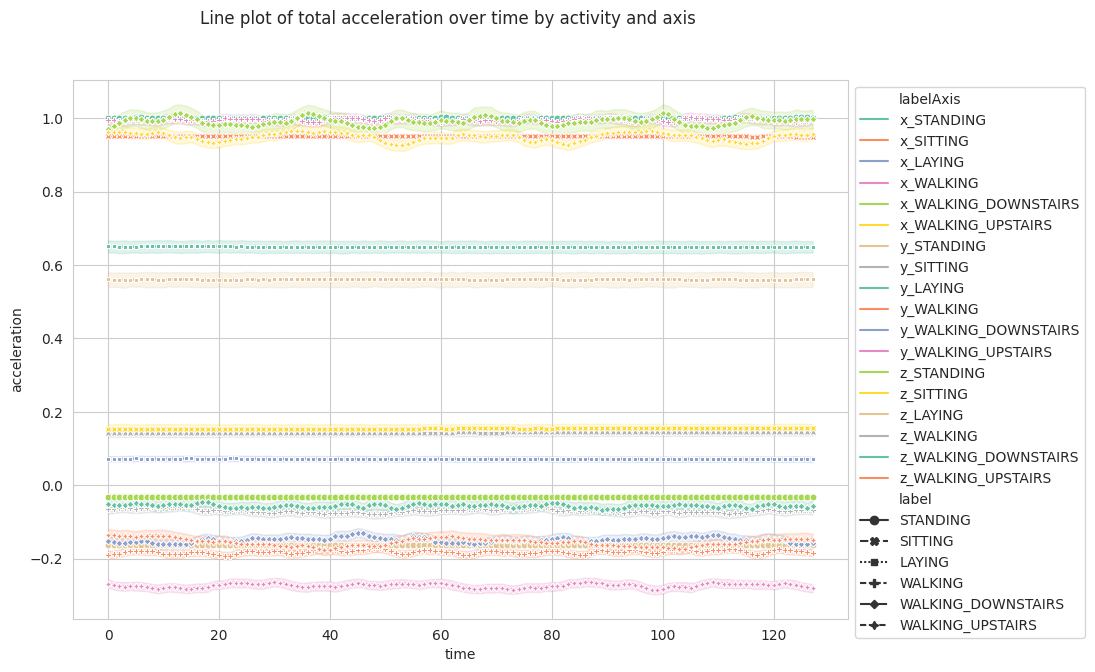

In [42]:
plt.figure(figsize=(10, 7))
sns.lineplot(data=df_long, x="time", y="acceleration", hue="labelAxis", style="label", palette=sns.color_palette("Set2", 18), markers=True, markersize=5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.suptitle("Line plot of total acceleration over time by activity and axis")
plt.show()
